## Support Vector Machine (SVM)

### What is SVM?
SVM is a **supervised machine learning algorithm** used for **classification** and **regression** tasks — mostly for classification.


### Goal:
To find the **best decision boundary (hyperplane)** that separates classes with the **maximum margin**.

---

### Key Concepts:
- **Hyperplane**: A line (in 2D), a plane (in 3D), or a higher-dimensional boundary that separates classes.
- **Support Vectors**: Data points closest to the hyperplane. These are critical to define the decision boundary.
- **Margin**: Distance between the hyperplane and the nearest data point from either class. SVM tries to **maximize this margin**.

---

### Intuition:
Imagine separating red and blue dots on a sheet with a straight line.
SVM finds **the most optimal line** that leaves the **widest possible gap** between the two sets of dots.

---

### Advantages:
- Works well in **high-dimensional space**.
- Effective even when **features > samples**.
- Uses **kernel tricks** to handle **non-linear data**.

---

### Simple Illustration:

```plaintext
   ● (Class A)        |         ○ (Class B)
   ●                 ||            ○
   ●                |||             ○
   ●               |||||            ○
      <--- Margin --->


The middle line ||| is the decision boundary (hyperplane).

The closest ● and ○ points to this line are called support vectors.

SVM tries to maximize the gap (margin) between the two groups, making the separation as clear as possible.


### KERNEL Functions

With the help of a kernel function we can introduce additional features to make the problem linearly seperable in a higher dimensional space.

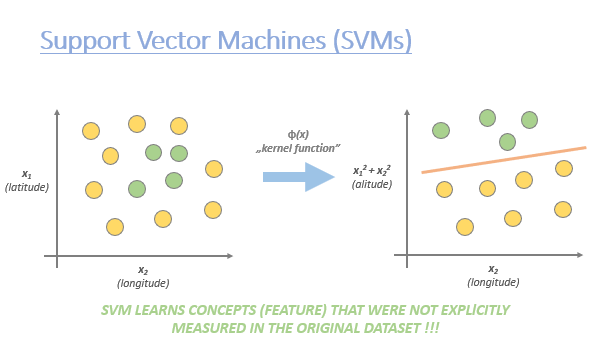



Cost function minimization

min w  [(1/2)||w||^2 + C(sigma |ai|)]

|ai| is the distance of the misclassified data points from the hyperplane. If C is very large, the algorithm tries to find a 100% seperation (can lead to overfitting) and if C is small then wider overall margin is allowed with more misclassified data points.

Low C value(around 1): smooth/simple hyperplane

High C value(10): complex surface 

In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
iris_data.target.shape

(150,)

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=42)
model=svm.SVC()
model.fit(Xtrain, ytrain)
predictions = model.predict(Xtest)
accuracy = accuracy_score(ytest, predictions)
confusion = confusion_matrix(ytest, predictions)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)

Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [6]:
print("Model Parameters:")
print("Kernel:", model.kernel)
print("C:", model.C)
print("Gamma:", model.gamma)
print("Support vectors shape:", model.support_vectors_.shape)
print("Number of support vectors for each class:", model.n_support_)
print("Indices of support vectors:", model.support_)
print("Dual Coefficients shape:", model.dual_coef_.shape)
print("Intercept (bias term):", model.intercept_)

Model Parameters:
Kernel: rbf
C: 1.0
Gamma: scale
Support vectors shape: (49, 4)
Number of support vectors for each class: [ 5 24 20]
Indices of support vectors: [ 13  16  17  18  76   3   7  14  19  24  30  34  39  44  45  47  58  64
  65  67  71  73  75  77  78  84  90  95  96   1   2  15  22  25  27  28
  35  41  48  53  66  68  70  72  86  94  97  98 101]
Dual Coefficients shape: (2, 49)
Intercept (bias term): [ 0.16629121 -0.07573598 -0.12413192]


### Parameter Tuning

In [7]:
param_grid = {
    'C': [0.1, 1,5, 10],
    'kernel': ['linear', 'rbf','poly','sigmoid'],
    'gamma': [0.01, 0.1, 1]
}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(Xtrain, ytrain)
print("Best parameters found:", grid_search.best_params_)


Best parameters found: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}


In [8]:
grid_predictions = grid_search.predict(Xtest)
grid_accuracy = accuracy_score(ytest, grid_predictions)

In [9]:
grid_accuracy

1.0

Stratified sampling ensures that each class or group in your dataset is represented proportionally in your train/test splits. This is especially useful when your dataset is imbalanced (e.g., 90% class A, 10% class B).

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

### DIGIT RECOGNITION DATASET

This dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64. Each entry of the vector between 0 and 15(darkest) to indicate the intensity. The output is a number between 0 & 9.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [13]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

In [14]:
y

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

In [17]:
model1=svm.SVC()
model1.fit(Xtrain, ytrain)
predictions = model1.predict(Xtest)
accuracy = accuracy_score(ytest, predictions)
confusion = confusion_matrix(ytest, predictions)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)

Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


### Disadvantages and advanntages

Disadvantages:

slow when having large number of features. No probabilities associated with the predictions unlike logistic regression. 


Advantages:
SVM can be used for both regression and classfication as well. Can be used even in infinite dimensions. Easier to use than neural networks.
It uses a subset of support vectors, so it is memory friendly.

Works well with small to medium datasets with a higher number of features.